In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Работа с air_reserve. Буду определять что за датасет, количество ненулевых и уникальных значений

Общий план: импортирую датафреймы для air, привожу их к дням, где надо и потом объединяю. Чищу от аномалий, думаю надо пропусками и потом смотрю от чего зависит и тд

In [330]:
df_air_reserve = pd.read_csv('recruit-restaurant-visitor-forecasting/air_reserve.csv')
df_air_store_info = pd.read_csv('recruit-restaurant-visitor-forecasting/air_store_info.csv')
df_visit_data = pd.read_csv('recruit-restaurant-visitor-forecasting/air_visit_data.csv')
hpg_df = pd.read_csv('recruit-restaurant-visitor-forecasting/hpg_reserve.csv')
store_id_relation = pd.read_csv('recruit-restaurant-visitor-forecasting/store_id_relation.csv')
hpg_store = pd.read_csv('recruit-restaurant-visitor-forecasting/hpg_store_info.csv')
date_df = pd.read_csv('recruit-restaurant-visitor-forecasting/date_info.csv')

In [331]:
store_id_relation.shape


(150, 2)

In [373]:
print(date_df.shape)
date_df

(517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
...,...,...,...
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0


In [332]:
store_id_relation.isnull().sum()

air_store_id    0
hpg_store_id    0
dtype: int64

Просмотр этого набора данных

In [333]:
df_air_reserve.head(10)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2


Для начала рассмотрим зависимость количества людей по дням, для этого сложу в первом даатафрейме количество зарезервировавшихся пользователей по дням

In [334]:
df_air_reserve['visit_datetime'] = pd.to_datetime(df_air_reserve['visit_datetime'])
df_air_reserve['reserve_datetime'] = pd.to_datetime(df_air_reserve['reserve_datetime'])
df_air_reserve['reserve_date'] = df_air_reserve['reserve_datetime'].dt.date
df_air_reserve['visit_date'] = df_air_reserve['visit_datetime'].dt.date




In [335]:
df_air_reserve = df_air_reserve.groupby(['air_store_id', 'visit_date', 'reserve_date'])['reserve_visitors'].sum().reset_index()

In [336]:
df_air_reserve

,air_store_id,visit_date,reserve_date,reserve_visitors
0,air_00a91d42b08b08d9,2016-10-31,2016-10-31,2
1,air_00a91d42b08b08d9,2016-12-05,2016-12-01,9
2,air_00a91d42b08b08d9,2016-12-14,2016-12-08,18
3,air_00a91d42b08b08d9,2016-12-17,2016-12-11,2
4,air_00a91d42b08b08d9,2016-12-20,2016-12-18,4
...,...,...,...,...
67415,air_fea5dc9594450608,2017-04-25,2017-04-16,2
67416,air_fea5dc9594450608,2017-04-28,2017-03-30,3
67417,air_fea5dc9594450608,2017-05-20,2017-04-16,6
67418,air_fee8dcf4d619598e,2017-01-09,2016-12-27,2


In [337]:
df_air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [338]:
air_df = pd.merge(df_air_reserve, df_air_store_info, on='air_store_id', how='outer')

In [339]:
air_df.head(10)

,air_store_id,visit_date,reserve_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,2016-10-31,2016-10-31,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,2016-12-05,2016-12-01,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9,2016-12-14,2016-12-08,18.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9,2016-12-17,2016-12-11,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9,2016-12-20,2016-12-18,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
5,air_00a91d42b08b08d9,2017-02-18,2017-02-13,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
6,air_00a91d42b08b08d9,2017-02-23,2017-02-21,12.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
7,air_00a91d42b08b08d9,2017-03-01,2017-02-18,3.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
8,air_00a91d42b08b08d9,2017-03-14,2017-03-14,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
9,air_00a91d42b08b08d9,2017-03-21,2017-03-16,3.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


In [340]:
df_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [341]:
df_visit_data.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


In [342]:
air_df

,air_store_id,visit_date,reserve_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,2016-10-31,2016-10-31,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,2016-12-05,2016-12-01,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9,2016-12-14,2016-12-08,18.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9,2016-12-17,2016-12-11,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9,2016-12-20,2016-12-18,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
...,...,...,...,...,...,...,...,...
67930,air_fee8dcf4d619598e,2017-01-09,2016-12-27,2.0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
67931,air_fee8dcf4d619598e,2017-01-09,2017-01-06,3.0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
67932,air_fef9ccb3ba0da2f7,NaN,NaN,NaN,Japanese food,Hyōgo-ken Himeji-shi Yasuda,34.815149,134.685353
67933,air_ffcc2d5087e1b476,NaN,NaN,NaN,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [343]:
air_df = pd.merge(air_df, df_visit_data, on=['air_store_id', 'visit_date'], how='outer')

In [344]:
air_df.head(10)

,air_store_id,visit_date,reserve_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,visitors
0,air_00a91d42b08b08d9,2016-10-31,2016-10-31,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
1,air_00a91d42b08b08d9,2016-12-05,2016-12-01,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
2,air_00a91d42b08b08d9,2016-12-14,2016-12-08,18.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
3,air_00a91d42b08b08d9,2016-12-17,2016-12-11,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
4,air_00a91d42b08b08d9,2016-12-20,2016-12-18,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
5,air_00a91d42b08b08d9,2017-02-18,2017-02-13,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
6,air_00a91d42b08b08d9,2017-02-23,2017-02-21,12.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
7,air_00a91d42b08b08d9,2017-03-01,2017-02-18,3.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
8,air_00a91d42b08b08d9,2017-03-14,2017-03-14,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
9,air_00a91d42b08b08d9,2017-03-21,2017-03-16,3.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN


In [345]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320043 entries, 0 to 320042
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   air_store_id      320043 non-null  object 
 1   visit_date        319528 non-null  object 
 2   reserve_date      67420 non-null   object 
 3   reserve_visitors  67420 non-null   float64
 4   air_genre_name    67935 non-null   object 
 5   air_area_name     67935 non-null   object 
 6   latitude          67935 non-null   float64
 7   longitude         67935 non-null   float64
 8   visitors          252108 non-null  float64
dtypes: float64(4), object(5)
memory usage: 22.0+ MB


In [346]:
air_df.describe()

,reserve_visitors,latitude,longitude,visitors
count,67420.000000,67935.000000,67935.000000,252108.000000
mean,6.140834,36.268408,137.205893,20.973761
std,6.821479,2.974874,3.780914,16.757007
min,1.000000,33.211967,130.195555,1.000000
25%,2.000000,34.681261,134.841177,9.000000
50%,4.000000,35.641463,139.036327,17.000000
75%,7.000000,35.699566,139.770825,29.000000
max,450.000000,44.020632,144.273398,877.000000


In [347]:
air_df = pd.merge(air_df, store_id_relation, on=['air_store_id'], how='outer')

In [348]:
air_df

,air_store_id,visit_date,reserve_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,visitors,hpg_store_id
0,air_00a91d42b08b08d9,2016-10-31,2016-10-31,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN,hpg_fbe603376b5980fc
1,air_00a91d42b08b08d9,2016-12-05,2016-12-01,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN,hpg_fbe603376b5980fc
2,air_00a91d42b08b08d9,2016-12-14,2016-12-08,18.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN,hpg_fbe603376b5980fc
3,air_00a91d42b08b08d9,2016-12-17,2016-12-11,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN,hpg_fbe603376b5980fc
4,air_00a91d42b08b08d9,2016-12-20,2016-12-18,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN,hpg_fbe603376b5980fc
...,...,...,...,...,...,...,...,...,...,...
320038,air_fff68b929994bfbd,2017-04-19,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
320039,air_fff68b929994bfbd,2017-04-20,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
320040,air_fff68b929994bfbd,2017-04-21,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
320041,air_fff68b929994bfbd,2017-04-22,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


In [349]:
air_df=air_df[['air_store_id','hpg_store_id', 'visit_date','visitors', 'reserve_visitors', 'air_genre_name', 'air_area_name', 'latitude', 'longitude']]

In [350]:
air_df = air_df.rename(columns={'air_genre_name':'genre_name', 'air_area_name':'area_name'})


In [351]:
air_df

,air_store_id,hpg_store_id,visit_date,visitors,reserve_visitors,genre_name,area_name,latitude,longitude
0,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-10-31,NaN,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-12-05,NaN,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-12-14,NaN,18.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-12-17,NaN,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-12-20,NaN,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
...,...,...,...,...,...,...,...,...,...
320038,air_fff68b929994bfbd,NaN,2017-04-19,2.0,NaN,NaN,NaN,NaN,NaN
320039,air_fff68b929994bfbd,NaN,2017-04-20,2.0,NaN,NaN,NaN,NaN,NaN
320040,air_fff68b929994bfbd,NaN,2017-04-21,4.0,NaN,NaN,NaN,NaN,NaN
320041,air_fff68b929994bfbd,NaN,2017-04-22,5.0,NaN,NaN,NaN,NaN,NaN


Так как данные с пустым столбцом посетителей нам не нужны (это целевая переменная) удаляем их

In [352]:
air_df.dropna(subset='visitors', inplace=True)
air_df['visitors'] = air_df['visitors'].astype(int)

In [353]:
air_df

,air_store_id,hpg_store_id,visit_date,visitors,reserve_visitors,genre_name,area_name,latitude,longitude
12,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-01,35,NaN,NaN,NaN,NaN,NaN
13,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-02,9,NaN,NaN,NaN,NaN,NaN
14,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-04,20,NaN,NaN,NaN,NaN,NaN
15,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-05,25,NaN,NaN,NaN,NaN,NaN
16,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-06,29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
320037,air_fff68b929994bfbd,NaN,2017-04-18,6,NaN,NaN,NaN,NaN,NaN
320038,air_fff68b929994bfbd,NaN,2017-04-19,2,NaN,NaN,NaN,NaN,NaN
320039,air_fff68b929994bfbd,NaN,2017-04-20,2,NaN,NaN,NaN,NaN,NaN
320040,air_fff68b929994bfbd,NaN,2017-04-21,4,NaN,NaN,NaN,NaN,NaN


In [371]:
air_df.shape

(252108, 9)

С первой системой данных выполнил объединение

In [354]:
hpg_df.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [355]:
hpg_df['visit_datetime'] = pd.to_datetime(hpg_df['visit_datetime'])
hpg_df['reserve_datetime'] = pd.to_datetime(hpg_df['reserve_datetime'])
hpg_df['reserve_date'] = hpg_df['reserve_datetime'].dt.date
hpg_df['visit_date'] = hpg_df['visit_datetime'].dt.date

In [356]:
hpg_df = hpg_df.groupby(['hpg_store_id', 'visit_date', 'reserve_date'])[
    'reserve_visitors'].sum().reset_index()

In [357]:
hpg_df.head()

,hpg_store_id,visit_date,reserve_date,reserve_visitors
0,hpg_001112ef76b9802c,2016-02-26,2016-02-09,9
1,hpg_001112ef76b9802c,2016-03-17,2016-03-03,3
2,hpg_001112ef76b9802c,2016-03-31,2016-03-25,5
3,hpg_001112ef76b9802c,2016-04-05,2016-04-01,13
4,hpg_001112ef76b9802c,2016-04-18,2016-04-15,9


In [358]:
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [359]:
hpg_store.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [360]:
hpg_df = pd.merge(store_id_relation, hpg_df, on='hpg_store_id', how='outer')


In [361]:
hpg_df

,air_store_id,hpg_store_id,visit_date,reserve_date,reserve_visitors
0,NaN,hpg_001112ef76b9802c,2016-02-26,2016-02-09,9
1,NaN,hpg_001112ef76b9802c,2016-03-17,2016-03-03,3
2,NaN,hpg_001112ef76b9802c,2016-03-31,2016-03-25,5
3,NaN,hpg_001112ef76b9802c,2016-04-05,2016-04-01,13
4,NaN,hpg_001112ef76b9802c,2016-04-18,2016-04-15,9
...,...,...,...,...,...
1879297,NaN,hpg_fffc097dce87af3e,2017-03-10,2017-03-06,2
1879298,NaN,hpg_fffc097dce87af3e,2017-03-17,2017-02-22,2
1879299,NaN,hpg_fffc097dce87af3e,2017-03-27,2017-03-22,5
1879300,NaN,hpg_fffc097dce87af3e,2017-04-21,2017-04-18,3


In [362]:
hpg_df = pd.merge(hpg_df, hpg_store, on='hpg_store_id', how='outer')

In [363]:
hpg_df

,air_store_id,hpg_store_id,visit_date,reserve_date,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude
0,NaN,hpg_001112ef76b9802c,2016-02-26,2016-02-09,9,NaN,NaN,NaN,NaN
1,NaN,hpg_001112ef76b9802c,2016-03-17,2016-03-03,3,NaN,NaN,NaN,NaN
2,NaN,hpg_001112ef76b9802c,2016-03-31,2016-03-25,5,NaN,NaN,NaN,NaN
3,NaN,hpg_001112ef76b9802c,2016-04-05,2016-04-01,13,NaN,NaN,NaN,NaN
4,NaN,hpg_001112ef76b9802c,2016-04-18,2016-04-15,9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1879297,NaN,hpg_fffc097dce87af3e,2017-03-10,2017-03-06,2,NaN,NaN,NaN,NaN
1879298,NaN,hpg_fffc097dce87af3e,2017-03-17,2017-02-22,2,NaN,NaN,NaN,NaN
1879299,NaN,hpg_fffc097dce87af3e,2017-03-27,2017-03-22,5,NaN,NaN,NaN,NaN
1879300,NaN,hpg_fffc097dce87af3e,2017-04-21,2017-04-18,3,NaN,NaN,NaN,NaN


In [364]:
hpg_df=hpg_df[['air_store_id','hpg_store_id', 'visit_date', 'reserve_visitors', 'hpg_genre_name', 'hpg_area_name', 'latitude', 'longitude']]

In [365]:
hpg_df = hpg_df.rename(columns={'hpg_genre_name':'genre_name', 'hpg_area_name':'area_name'})

In [366]:
hpg_df

,air_store_id,hpg_store_id,visit_date,reserve_visitors,genre_name,area_name,latitude,longitude
0,NaN,hpg_001112ef76b9802c,2016-02-26,9,NaN,NaN,NaN,NaN
1,NaN,hpg_001112ef76b9802c,2016-03-17,3,NaN,NaN,NaN,NaN
2,NaN,hpg_001112ef76b9802c,2016-03-31,5,NaN,NaN,NaN,NaN
3,NaN,hpg_001112ef76b9802c,2016-04-05,13,NaN,NaN,NaN,NaN
4,NaN,hpg_001112ef76b9802c,2016-04-18,9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1879297,NaN,hpg_fffc097dce87af3e,2017-03-10,2,NaN,NaN,NaN,NaN
1879298,NaN,hpg_fffc097dce87af3e,2017-03-17,2,NaN,NaN,NaN,NaN
1879299,NaN,hpg_fffc097dce87af3e,2017-03-27,5,NaN,NaN,NaN,NaN
1879300,NaN,hpg_fffc097dce87af3e,2017-04-21,3,NaN,NaN,NaN,NaN


Объедини данные для второй системы


In [367]:
print(air_df.shape)
air_df.isnull().sum()

(252108, 9)


air_store_id             0
hpg_store_id        206089
visit_date               0
visitors                 0
reserve_visitors    252108
genre_name          252108
area_name           252108
latitude            252108
longitude           252108
dtype: int64

In [368]:
print(hpg_df.shape)
hpg_df.isnull().sum()

(1879302, 8)


air_store_id        1852770
hpg_store_id              0
visit_date                0
reserve_visitors          0
genre_name          1065690
area_name           1065690
latitude            1065690
longitude           1065690
dtype: int64

In [369]:
print(air_df.air_store_id.nunique(), hpg_df.air_store_id.nunique(), air_df.hpg_store_id.nunique(), hpg_df.hpg_store_id.nunique())

829 150 150 13325


In [296]:
df = pd.merge(air_df, hpg_df, on=['air_store_id', 'hpg_store_id','visit_date' , 'reserve_visitors', 'area_name', 'genre_name', 'latitude', 'longitude'], how='outer')

In [297]:
df

,air_store_id,hpg_store_id,visit_date,visitors,reserve_visitors,genre_name,area_name,latitude,longitude
0,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-14,NaN,2.0,NaN,NaN,NaN,NaN
1,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-15,NaN,4.0,NaN,NaN,NaN,NaN
2,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-16,NaN,2.0,NaN,NaN,NaN,NaN
3,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-22,NaN,2.0,NaN,NaN,NaN,NaN
4,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-29,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2199340,NaN,hpg_fffc097dce87af3e,2017-03-10,NaN,2.0,NaN,NaN,NaN,NaN
2199341,NaN,hpg_fffc097dce87af3e,2017-03-17,NaN,2.0,NaN,NaN,NaN,NaN
2199342,NaN,hpg_fffc097dce87af3e,2017-03-27,NaN,5.0,NaN,NaN,NaN,NaN
2199343,NaN,hpg_fffc097dce87af3e,2017-04-21,NaN,3.0,NaN,NaN,NaN,NaN


In [370]:
print(df.shape)
df.isnull().sum()

(2199345, 9)


air_store_id        1852770
hpg_store_id         247192
visit_date              515
visitors            1947237
reserve_visitors     252623
genre_name          1317798
area_name           1317798
latitude            1317798
longitude           1317798
dtype: int64

In [375]:
print(df.visit_date.unique)
df.columns

<bound method Series.unique of 0          2016-01-14
1          2016-01-15
2          2016-01-16
3          2016-01-22
4          2016-01-29
              ...    
2199340    2017-03-10
2199341    2017-03-17
2199342    2017-03-27
2199343    2017-04-21
2199344    2017-04-23
Name: visit_date, Length: 2199345, dtype: object>


Index(['air_store_id', 'hpg_store_id', 'visit_date', 'visitors',
       'reserve_visitors', 'genre_name', 'area_name', 'latitude', 'longitude'],
      dtype='object')

In [379]:
df_full = df.dropna(subset=['visitors'])
print(df_full.shape)
df_full

(252108, 9)


,air_store_id,hpg_store_id,visit_date,visitors,reserve_visitors,genre_name,area_name,latitude,longitude
123,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-01,35.0,NaN,NaN,NaN,NaN,NaN
124,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-02,9.0,NaN,NaN,NaN,NaN,NaN
125,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-04,20.0,NaN,NaN,NaN,NaN,NaN
126,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-05,25.0,NaN,NaN,NaN,NaN,NaN
127,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-07-06,29.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
346569,air_fff68b929994bfbd,NaN,2017-04-18,6.0,NaN,NaN,NaN,NaN,NaN
346570,air_fff68b929994bfbd,NaN,2017-04-19,2.0,NaN,NaN,NaN,NaN,NaN
346571,air_fff68b929994bfbd,NaN,2017-04-20,2.0,NaN,NaN,NaN,NaN,NaN
346572,air_fff68b929994bfbd,NaN,2017-04-21,4.0,NaN,NaN,NaN,NaN,NaN


In [380]:
df_missing = df[df['visitors'].isna()]
print(df_missing.shape)
df_missing

(1947237, 9)


,air_store_id,hpg_store_id,visit_date,visitors,reserve_visitors,genre_name,area_name,latitude,longitude
0,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-14,NaN,2.0,NaN,NaN,NaN,NaN
1,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-15,NaN,4.0,NaN,NaN,NaN,NaN
2,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-16,NaN,2.0,NaN,NaN,NaN,NaN
3,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-22,NaN,2.0,NaN,NaN,NaN,NaN
4,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,2016-01-29,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2199340,NaN,hpg_fffc097dce87af3e,2017-03-10,NaN,2.0,NaN,NaN,NaN,NaN
2199341,NaN,hpg_fffc097dce87af3e,2017-03-17,NaN,2.0,NaN,NaN,NaN,NaN
2199342,NaN,hpg_fffc097dce87af3e,2017-03-27,NaN,5.0,NaN,NaN,NaN,NaN
2199343,NaN,hpg_fffc097dce87af3e,2017-04-21,NaN,3.0,NaN,NaN,NaN,NaN


In [383]:
df_result_air = df_full.set_index(['air_store_id', 'visit_date']).combine_first(
    df_missing.set_index(['air_store_id', 'visit_date'])
).reset_index()
# Объединяем по hpg_store_id и visit_date
df_result_hpg = df_full.set_index(['hpg_store_id', 'visit_date']).combine_first(
    df_missing.set_index(['hpg_store_id', 'visit_date'])
).reset_index()

# Объединяем результаты двух объединений
df_result = pd.concat([df_result_air, df_result_hpg]).drop_duplicates()

# Оставляем только строки с заполненным visitors
df_result = df_result[df_result['visitors'].notna()]

# Удаляем дубликаты, если они есть
df_result = df_result.drop_duplicates()
print(df_result.shape)
df=df_result
df['visitors'] = df['visitors'].astype(int)
df

(252108, 9)


,air_store_id,visit_date,hpg_store_id,visitors,reserve_visitors,genre_name,area_name,latitude,longitude
123,air_00a91d42b08b08d9,2016-07-01,hpg_fbe603376b5980fc,35,NaN,NaN,NaN,NaN,NaN
124,air_00a91d42b08b08d9,2016-07-02,hpg_fbe603376b5980fc,9,NaN,NaN,NaN,NaN,NaN
125,air_00a91d42b08b08d9,2016-07-04,hpg_fbe603376b5980fc,20,NaN,NaN,NaN,NaN,NaN
126,air_00a91d42b08b08d9,2016-07-05,hpg_fbe603376b5980fc,25,NaN,NaN,NaN,NaN,NaN
127,air_00a91d42b08b08d9,2016-07-06,hpg_fbe603376b5980fc,29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
346569,air_fff68b929994bfbd,2017-04-18,NaN,6,NaN,NaN,NaN,NaN,NaN
346570,air_fff68b929994bfbd,2017-04-19,NaN,2,NaN,NaN,NaN,NaN,NaN
346571,air_fff68b929994bfbd,2017-04-20,NaN,2,NaN,NaN,NaN,NaN,NaN
346572,air_fff68b929994bfbd,2017-04-21,NaN,4,NaN,NaN,NaN,NaN,NaN


вот я объединил это хорошо, но теперь надо выбрать вариант: 
1.  Объединить датасеты 
2. Дополнить датасет air

 Я иду по второму пути, потому что у air есть данные о посетителях, а у второго нет. Но надо по максимуму дополнить по остальным данным и это сделаю из второго датасета. Потом опять удалю все, что без значения количества посетителей и проверю аномальные значения.


In [1]:
plt.figure(figsize=(8,6))
plt.hist(air_df['reserve_visitors'], bins=20)
plt.xlim(-5, 200)
plt.xlabel('Reserve Visitors')
plt.ylabel('Frequency')
plt.title('Histogram of Reserve Visitors')
plt.show()

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'Ящик с усами для количества забронированных пользователей (с аномалиями)')

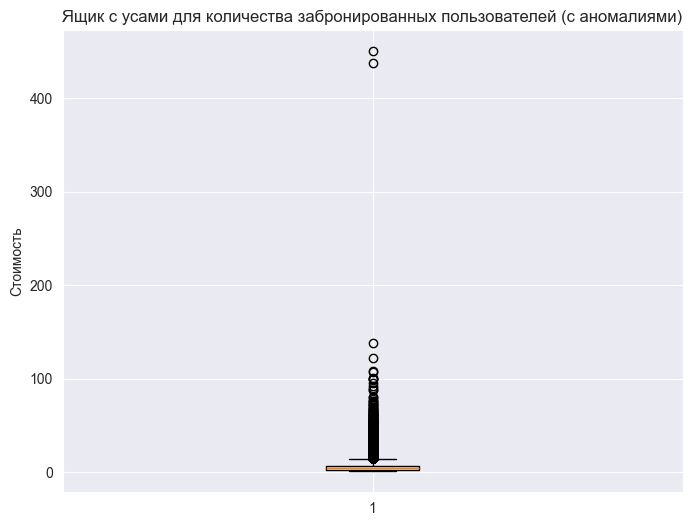

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(df_air_reserve['reserve_visitors'])
ax.set_ylabel('Стоимость')
ax.set_title('Ящик с усами для количества забронированных пользователей (с аномалиями)')


Text(0.5, 1.0, 'Ящик с усами для количества забронированных пользователей (без аномалий)')

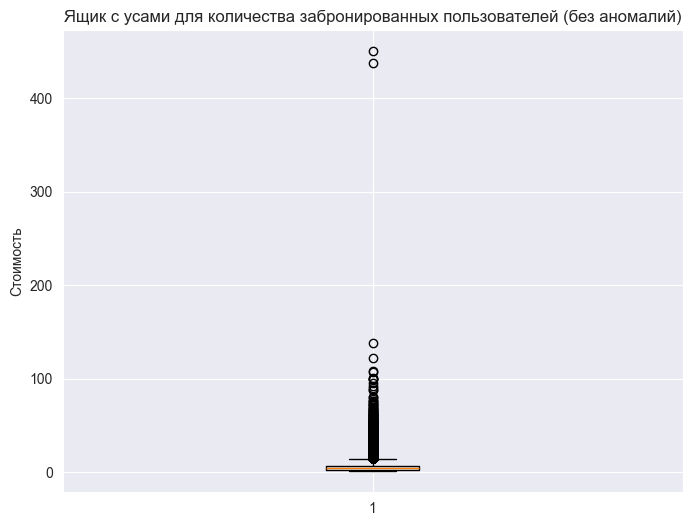

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(df_air_reserve['reserve_visitors'])
ax.set_ylabel('Стоимость')
ax.set_title('Ящик с усами для количества забронированных пользователей (без аномалий)')

In [110]:
df_air_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   air_store_id      64320 non-null  object
 1   visit_date        64320 non-null  object
 2   reserve_date      64320 non-null  object
 3   reserve_visitors  64320 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [118]:
df_air_reserve.describe()

,reserve_visitors
count,61152.000000
mean,4.587667
std,3.355636
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,79.000000


In [53]:
df_air_reserve.shape

(83304, 4)

(67420, 4)

In [89]:
cols = df_air_reserve.columns
for col in cols:
    print(f"Характеристика: {col}")
    print("Количество уникальных значений:", {df_air_reserve[col].nunique()})
    print('///////////////////////////////////////////////////')

Характеристика: air_store_id
Количество уникальных значений: {314}
///////////////////////////////////////////////////
Характеристика: visit_date
Количество уникальных значений: {433}
///////////////////////////////////////////////////
Характеристика: reserve_date
Количество уникальных значений: {476}
///////////////////////////////////////////////////
Характеристика: reserve_visitors
Количество уникальных значений: {54}
///////////////////////////////////////////////////


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   air_store_id    829 non-null    object 
 1   air_genre_name  829 non-null    object 
 2   air_area_name   829 non-null    object 
 3   latitude        829 non-null    float64
 4   longitude       829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


(829, 5)

In [18]:
cols = df_air_store_info.columns
for col in cols:
    print(f"Характеристика: {col}")
    print("Количество уникальных значений:", {df_air_store_info[col].nunique()})
    print('///////////////////////////////////////////////////')

Характеристика: air_store_id
Количество уникальных значений: {829}
///////////////////////////////////////////////////
Характеристика: air_genre_name
Количество уникальных значений: {14}
///////////////////////////////////////////////////
Характеристика: air_area_name
Количество уникальных значений: {103}
///////////////////////////////////////////////////
Характеристика: latitude
Количество уникальных значений: {108}
///////////////////////////////////////////////////
Характеристика: longitude
Количество уникальных значений: {108}
///////////////////////////////////////////////////


In [ ]:
df_air_reserve = 